# Bar Charts

First of all, let's use plots as we have learnt in the previous notebook to make a contrast between `.plot()` method and `.bar()` method.

In [1]:
from matplotlib import pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Median Developer Salaries by Age
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

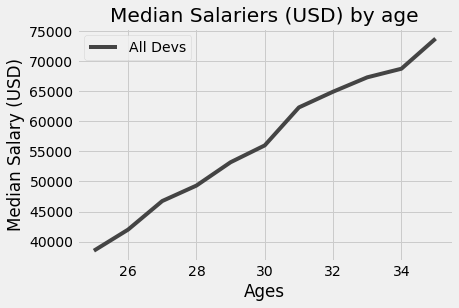

In [4]:
plt.plot(ages_x, dev_y, color='#444444', label='All Devs')
plt.title('Median Salariers (USD) by age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.legend()

We can just replace the .plot method to .bar method for ploting a bar chart.

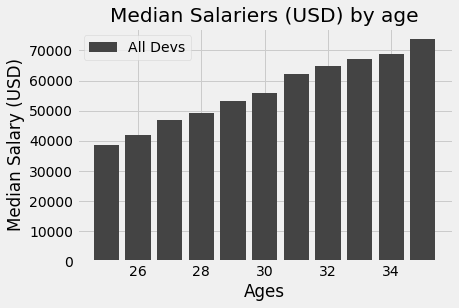

In [5]:
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')
plt.title('Median Salariers (USD) by age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.legend()

The problem with bar charts is that if we are plotting bar charts for several datasets in one graph, the bar charts of these several datasets will overlap each others and get layered on top of each others.

In [6]:
# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

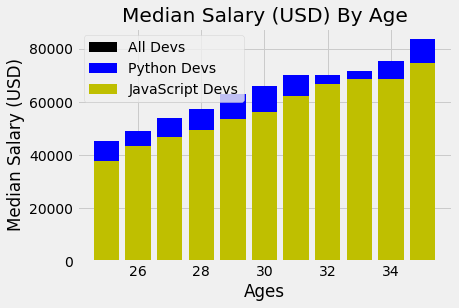

In [7]:
plt.bar(ages_x, dev_y, color='k', label='All Devs')
plt.bar(ages_x, py_dev_y, color='b', label='Python Devs')
plt.bar(ages_x, js_dev_y, color='y', label='JavaScript Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) By Age')
plt.legend()
plt.show()

To solve the problem of overlapping, we set x-axis data to a range of numbers that starts from Zero up to the length of the true x-axis data (ages_x in our case) and define a width for bars, then offset each bar chart of each dataset based on this width and the total number of bar charts, by adding or subtracting multiples of width to or from the new x-axis range data.     
for example, if we have three datasets, then we offset the first one one width to the left, leave the middle one unchanged and offset the third one to the right.

In [8]:
import numpy as np

In [9]:
x_indexes = np.arange(len(ages_x))
width = 0.25

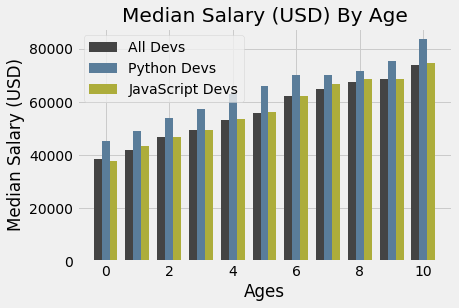

In [10]:
plt.bar(x_indexes - width, dev_y, width=width, color='#444444', label='All Devs')
plt.bar(x_indexes, py_dev_y, width=width, color='#5a7d9a', label='Python Devs')
plt.bar(x_indexes + width, js_dev_y, width=width, color='#adad3b', label='JavaScript Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) By Age')
plt.legend()
plt.show()

As we see, now the x-axis is not what we want, it is a range from 0 to 10, which is the list of range numbers we created to be able to offset the different datasets by adding or subtracting a  defined bar width. To return the list of ages back agian, we use the method `plt.xticks()` which takes as arguments, `ticks`= `the current x-axis values, in our case it is x_indexes`, and `labels` which indicates `the data that we want to set it as x-axis data, in our case it is ages_x `. 

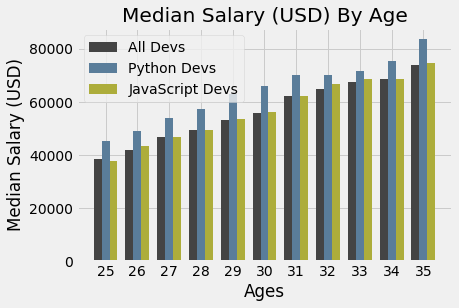

In [11]:
plt.bar(x_indexes - width, dev_y, width=width, color='#444444', label='All Devs')
plt.bar(x_indexes, py_dev_y, width=width, color='#5a7d9a', label='Python Devs')
plt.bar(x_indexes + width, js_dev_y, width=width, color='#adad3b', label='JavaScript Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) By Age')
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.legend()
plt.show()

### Read data from csv file       
To read data from csv file we have several options,  we are going to explore two options.       
1- use csv module.      
2- use Pandas library.

### read data from csv file using csv module

In [12]:
import csv

We open the file data.csv in the `data` folder which is on the same directory as the file of our code. Then we use `csv.DictReader(file_object)` method which returns an iterator of dictionaries where each dictionary contains data of a one line from the file and the keys are the entries of the first line by default, or they could be passed as an argument to the method `csv.DictReader(file_object)`.

In [13]:
with open('data/data.csv') as file_csv:
    file_reader = csv.DictReader(file_csv)
    print(next(file_reader))

{'Responder_id': '1', 'LanguagesWorkedWith': 'HTML/CSS;Java;JavaScript;Python'}


The output of the previous cell shows the first line from the date in the csv file, there are two keys, the first one is the respondent_id and the second one is the corresponding programming languages that each respondent is familiar with. Our task is to extract these languages and store them in a list, in addition to count the frequency of each language as it appeared in the data. then store these frequencies ina separated list too.      
Let's say that we want to extract from the file's data, a list of languages and a list of their popularity. To do this, we need to count languages.       
For counting languages, we can use a regular dictionary or use Counter from Collections module. Let's use the Counter directly.

In [14]:
from collections import Counter

In [15]:
c = Counter()
languages = []
popularity = []

with open('data/data.csv') as file_csv:
    file_reader = csv.DictReader(file_csv)
    
    for row in file_reader:
        c.update(row['LanguagesWorkedWith'].split(';'))

for row in c.items():
        languages.append(row[0])
        popularity.append(row[1])


Now we have a `languages` list and a `popularity` list. we can plot a bar chart based on them.

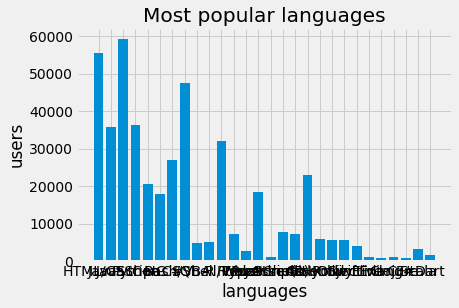

In [16]:
plt.bar(languages, popularity)
plt.title('Most popular languages')
plt.xlabel('languages')
plt.ylabel('users')
plt.show()

As we see because we have a big number of langauges their names do not fit together in the x-axis and they appear overlapping. Instead we can use horizontal bar charts where languages labels will appear on the y-axis. the method of horizontal bar charts is `plt.barh()`.

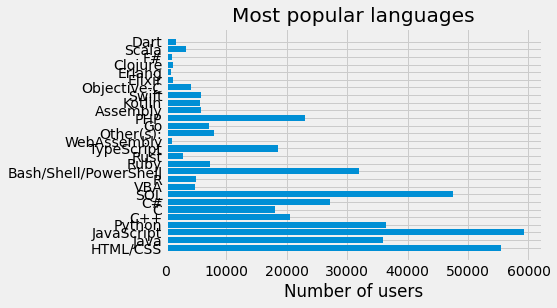

In [17]:
plt.barh(languages, popularity)
plt.title('Most popular languages')
plt.xlabel('Number of users')
plt.show()

Still the languages lables are cramped because they are big in number, but it is better than when the languages labels were on x-axis. To make them less cramped, we can reduce the number the displayed languages by choosing only the most common languages. The Counter data structure from Collections, provides a method the slice only a specified number of the most freqent elements, called `Counter.most_common(number_of_elements)`

In [18]:
c = Counter()
languages = []
popularity = []

with open('data/data.csv') as file_csv:
    file_reader = csv.DictReader(file_csv)
    
    for row in file_reader:
        c.update(row['LanguagesWorkedWith'].split(';'))

for row in c.most_common(15):
        languages.append(row[0])
        popularity.append(row[1])


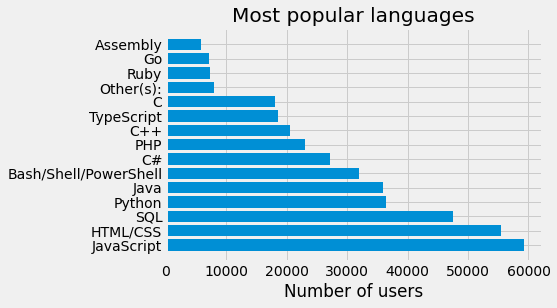

In [19]:
plt.barh(languages, popularity)
plt.title('Most popular languages')
plt.xlabel('Number of users')
plt.show()

if we want to reverse the order of the languages, so that the languages with high frequency appear from top to bottom, we have to reverse the lists, `languages` and `popularity`.

In [20]:
languages.reverse()
popularity.reverse()

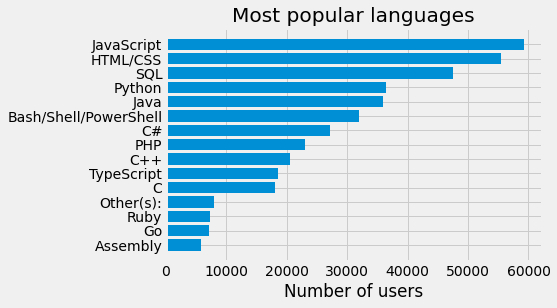

In [21]:
plt.barh(languages, popularity)
plt.title('Most popular languages')
plt.xlabel('Number of users')
plt.show()

### Read data from csv file using Pandas            
import pand

In [22]:
import pandas as pd

In [23]:
file_data = pd.read_csv('data/data.csv')

In [33]:
languages_counter = Counter()
languages = []
popularity = []

for response in file_data['LanguagesWorkedWith']:
    languages_counter.update(response.split(';'))
    
for lang in languages_counter.most_common(15):
    languages.append(lang[0])
    popularity.append(lang[1])

In [34]:
languages.reverse()
popularity.reverse()

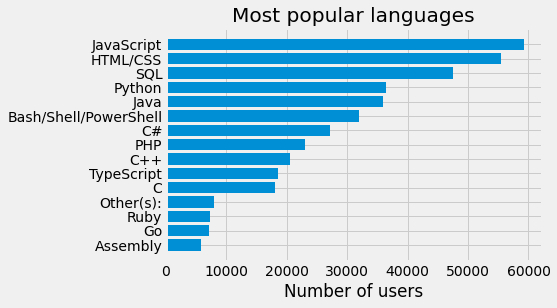

In [35]:
plt.barh(languages, popularity)
plt.title('Most popular languages')
plt.xlabel('Number of users')
plt.show()